stimulus start: 0.0, stimulus end: 1.0
simulating 426 neurons. Start: Tue Jun  7 16:41:12 2022
sim end: Tue Jun  7 16:42:45 2022


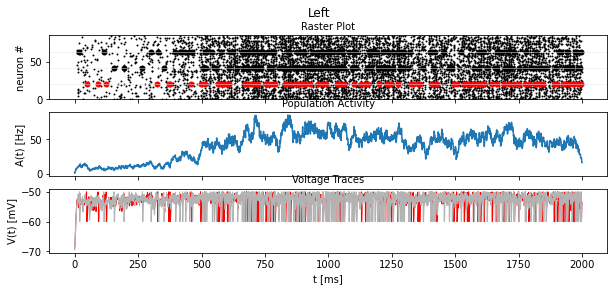

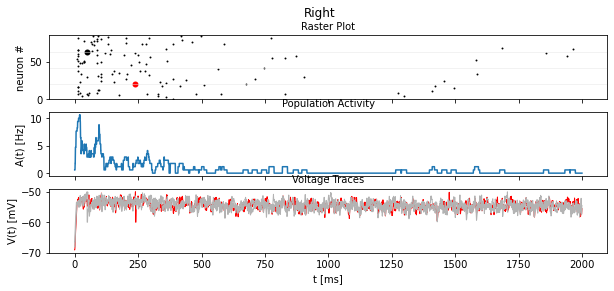

In [36]:
import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy
import matplotlib.pyplot as plt
from math import floor
import time

b2.defaultclock.dt = 0.10 * b2.ms

%matplotlib inline
from neurodynex3.competing_populations import decision_making

"""
A simple example to get started.
Returns:

"""
stim_start = 0. * b2.ms
stim_duration = 1000 * b2.ms
print("stimulus start: {}, stimulus end: {}".format(stim_start, stim_start+stim_duration))

results = decision_making.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                      t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                      coherence_level=+0.0, w_pos=2.0, mu0_mean_stimulus_Hz=250 * b2.Hz,
                                      max_sim_time=2000. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Right")

plt.show()



def get_spike_train_ts_indices(spike_train):
    """
    Helper. Extracts the spikes within the time window from the spike train
    """
    
    t_min = 0
    t_max = 2000
    
    ts = spike_train/b2.ms
    # spike_within_time_window = (ts >= t_min) & (ts <= t_max)
    # idx_spikes = numpy.where(spike_within_time_window)
    idx_spikes = (ts >= t_min) & (ts <= t_max)
    ts_spikes = ts[idx_spikes]
    return idx_spikes, ts_spikes





In [38]:
result_list.append(results)  

In [39]:
len(result_list)

5

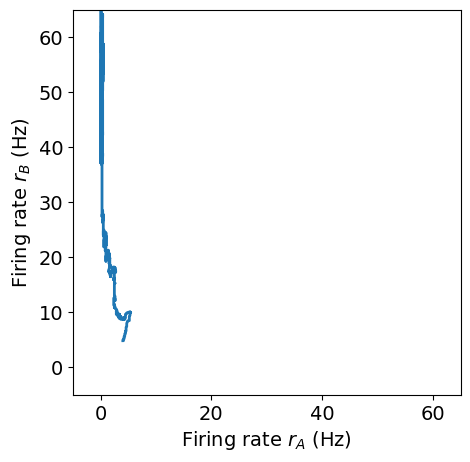

In [5]:

plt.style.use('default')
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['font.size'] = 14

rateA = results["rate_monitor_A"]
rateB = results["rate_monitor_B"]

window_width = 100.1 * b2.ms
#(ax_rate) = plt.plot(figsize=(5,5))
t_max  = 1500
t_min = 0 
ts = rateA.t / b2.ms
idx_rate = (ts >= t_min) & (ts <= t_max)
smoothed_rateA = rateA.smooth_rate(window="flat", width=window_width)/b2.Hz
smoothed_rateB = rateB.smooth_rate(window="flat", width=window_width)/b2.Hz

#smoothed_rates_128 = rate_monitor_128.smooth_rate(window="flat", width=window_width)/b2.Hz

plt.plot(smoothed_rateA[idx_rate], smoothed_rateB[idx_rate], linewidth= 2)
max_rate  = smoothed_rateB.max()
#plt.plot(ts[idx_rate], smoothed_rates_128[idx_rate])
#plt.plot(smoothed_rateB[idx_rate], smoothed_rateA[idx_rate])
plt.xlim([-5, max_rate])
plt.ylim([-5, max_rate])
plt.xlabel("Firing rate $r_A$ (Hz)")
plt.ylabel("Firing rate $r_B$ (Hz)")

plt.show()

Function 을 쓸 때는 py file 을 만들어서 간편하게 import 하고 function 을 불러서 쓸 수 있다. 

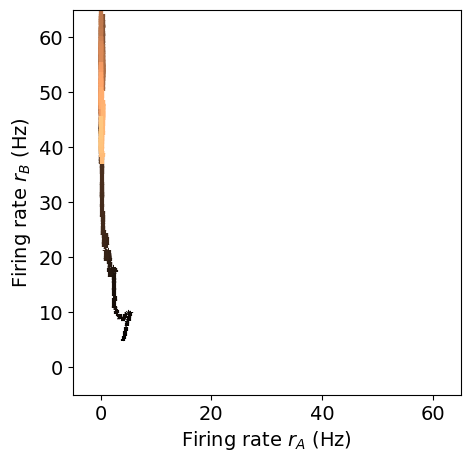

In [7]:
import line_plot as lp
# Sine wave colored by time

#x = np.linspace(0, 4.*np.pi, 1000)
#y = np.sin(x)

fig, axes = plt.subplots()

lp.colorline(smoothed_rateA[idx_rate], smoothed_rateB[idx_rate])

#plt.plot(smoothed_rateA[idx_rate], smoothed_rateB[idx_rate], linewidth= 2)

max_rate  = smoothed_rateB.max()
#plt.plot(ts[idx_rate], smoothed_rates_128[idx_rate])
#plt.plot(smoothed_rateB[idx_rate], smoothed_rateA[idx_rate])
plt.xlim([-5, max_rate])
plt.ylim([-5, max_rate])
plt.xlabel("Firing rate $r_A$ (Hz)")
plt.ylabel("Firing rate $r_B$ (Hz)")
plt.show()


In [9]:
result_list = []

In [11]:
result_list[0] = results

IndexError: list assignment index out of range

In [62]:

import line_plot as lp
def decision_space(results):
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (5,5)
    plt.rcParams['font.size'] = 14

    rateA = results["rate_monitor_A"]
    rateB = results["rate_monitor_B"]

    window_width = 100.1 * b2.ms
    #(ax_rate) = plt.plot(figsize=(5,5))
    t_max  = 1500
    t_min = 0 
    ts = rateA.t / b2.ms
    idx_rate = (ts >= t_min) & (ts <= t_max)
    smoothed_rateA = rateA.smooth_rate(window="flat", width=window_width)/b2.Hz
    smoothed_rateB = rateB.smooth_rate(window="flat", width=window_width)/b2.Hz

    #smoothed_rates_128 = rate_monitor_128.smooth_rate(window="flat", width=window_width)/b2.Hz

    #plt.plot(smoothed_rateA[idx_rate], smoothed_rateB[idx_rate], linewidth= 2)




    # Sine wave colored by time

    #x = np.linspace(0, 4.*np.pi, 1000)
    #y = np.sin(x)

    fig, axes = plt.subplots()

    lp.colorline(smoothed_rateA[idx_rate], smoothed_rateB[idx_rate], linewidth= 2, cmap=plt.get_cmap('copper'))

    #plt.plot(smoothed_rateA[idx_rate], smoothed_rateB[idx_rate], linewidth= 2)
    
    if smoothed_rateB.max() > smoothed_rateA.max():
        max_rate  = smoothed_rateB.max()
    else:
        max_rate = smoothed_rateA.max()
        
            
    
    #plt.plot(ts[idx_rate], smoothed_rates_128[idx_rate])
    #plt.plot(smoothed_rateB[idx_rate], smoothed_rateA[idx_rate])
    plt.xlim([-5, max_rate])
    plt.ylim([-5, max_rate])
    plt.xlabel("Firing rate $r_A$ (Hz)")
    plt.ylabel("Firing rate $r_B$ (Hz)")
    plt.show()


In [63]:
result_list.append(results)

In [65]:
result_list[1]

{'rate_monitor_A': <PopulationRateMonitor, recording neurongroup_5>,
 'spike_monitor_A': <SpikeMonitor, recording from spikemonitor_5>,
 'voltage_monitor_A': <StateMonitor, recording ['v'] from neurongroup_5>,
 'idx_monitored_neurons_A': [80,
  64,
  23,
  2,
  76,
  30,
  45,
  82,
  34,
  59,
  66,
  58,
  1,
  81,
  8,
  31,
  43,
  14,
  84,
  20,
  73,
  50,
  17,
  70,
  54,
  75,
  47,
  22,
  13,
  28,
  72,
  37,
  57,
  9,
  18,
  46,
  65,
  27,
  25,
  56,
  29,
  5,
  36,
  26,
  15,
  68,
  48,
  0,
  51,
  11,
  42,
  16,
  33,
  83,
  4,
  7,
  38,
  24,
  60,
  49,
  41,
  71,
  63,
  10,
  67,
  44,
  39,
  61,
  74,
  21,
  6,
  77,
  55,
  35,
  19,
  69,
  53,
  62,
  3,
  12,
  78,
  79,
  40,
  52,
  32],
 'rate_monitor_B': <PopulationRateMonitor, recording neurongroup_6>,
 'spike_monitor_B': <SpikeMonitor, recording from spikemonitor_6>,
 'voltage_monitor_B': <StateMonitor, recording ['v'] from neurongroup_6>,
 'idx_monitored_neurons_B': [62,
  36,
  69,
  35,
 

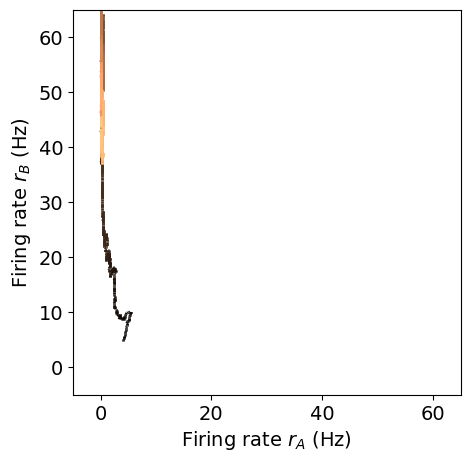

In [67]:
decision_space(result_list[0])

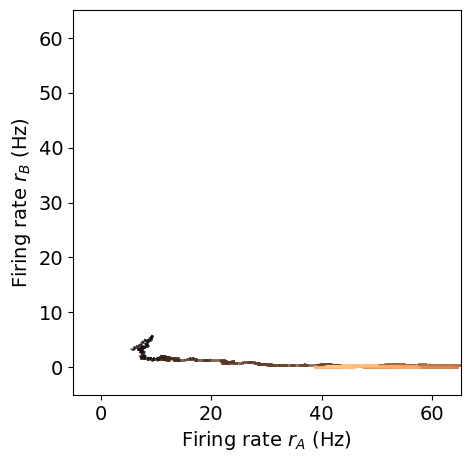

In [68]:
decision_space(result_list[4])

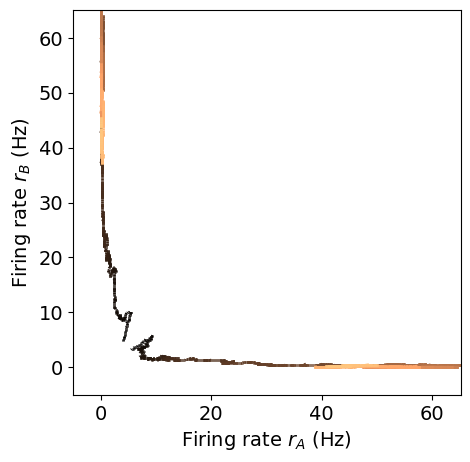

In [71]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['font.size'] = 14

rateA = results["rate_monitor_A"]
rateB = results["rate_monitor_B"]

rateA0 = result_list[0]["rate_monitor_A"]
rateB0 = result_list[0]["rate_monitor_B"]

window_width = 100.1 * b2.ms
#(ax_rate) = plt.plot(figsize=(5,5))
t_max  = 1500
t_min = 0 
ts = rateA.t / b2.ms
idx_rate = (ts >= t_min) & (ts <= t_max)
smoothed_rateA = rateA.smooth_rate(window="flat", width=window_width)/b2.Hz
smoothed_rateB = rateB.smooth_rate(window="flat", width=window_width)/b2.Hz

smoothed_rateA0 = rateA0.smooth_rate(window="flat", width=window_width)/b2.Hz
smoothed_rateB0 = rateB0.smooth_rate(window="flat", width=window_width)/b2.Hz


#smoothed_rates_128 = rate_monitor_128.smooth_rate(window="flat", width=window_width)/b2.Hz

#plt.plot(smoothed_rateA[idx_rate], smoothed_rateB[idx_rate], linewidth= 2)




# Sine wave colored by time

#x = np.linspace(0, 4.*np.pi, 1000)
#y = np.sin(x)

fig, axes = plt.subplots()

lp.colorline(smoothed_rateA[idx_rate], smoothed_rateB[idx_rate], linewidth= 2, cmap=plt.get_cmap('copper'))
lp.colorline(smoothed_rateA0[idx_rate], smoothed_rateB0[idx_rate], linewidth= 2, cmap=plt.get_cmap('copper'))
#plt.plot(smoothed_rateA[idx_rate], smoothed_rateB[idx_rate], linewidth= 2)

if smoothed_rateB.max() > smoothed_rateA.max():
    max_rate  = smoothed_rateB.max()
else:
    max_rate = smoothed_rateA.max()



#plt.plot(ts[idx_rate], smoothed_rates_128[idx_rate])
#plt.plot(smoothed_rateB[idx_rate], smoothed_rateA[idx_rate])
plt.xlim([-5, max_rate])
plt.ylim([-5, max_rate])
plt.xlabel("Firing rate $r_A$ (Hz)")
plt.ylabel("Firing rate $r_B$ (Hz)")
plt.show()


